In [ ]:
import pandas as pd

# Örnek veri
veri = {
    'yorum': [
        "Kargom geç geldi ama ürün harikaydı!",
        "Hayal kırıklığına uğradım, beklediğim gibi değil.",
        "Gayet güzel ve kaliteli, hızlı kargo için teşekkürler.",
        "Ürün güzel ama paketleme kötüydü.",
        "Ne yazık ki beklentimi karşılamadı."
    ],
    'puan': [4, 2, 5, 3, 2]  # 1 ile 5 arası
}

df = pd.DataFrame(veri)
df.head()


,yorum,puan
0,Kargom geç geldi ama ürün harikaydı!,4
1,"Hayal kırıklığına uğradım, beklediğim gibi değil.",2
2,"Gayet güzel ve kaliteli, hızlı kargo için teşe...",5
3,Ürün güzel ama paketleme kötüydü.,3
4,Ne yazık ki beklentimi karşılamadı.,2


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Her yoruma sentiment analizi uygulayalım
def duygu_skora_cevir(yorum):
    skorlar = analyzer.polarity_scores(yorum)
    return skorlar['compound']

df['duygu_skoru'] = df['yorum'].apply(duygu_skora_cevir)
print(df.duygu_skoru)



0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: duygu_skoru, dtype: float64


In [14]:
# Normalize puan (0–1 aralığına çekiyoruz)
df['puan_normalize'] = df['puan'] / 5

# Compound değeri de -1 ila 1 arası olduğundan 0–1'e çekiyoruz
df['duygu_normalize'] = (df['duygu_skoru'] + 1) / 2

# Her ikisine %50 ağırlık verelim (istersen değiştirebilirsin)
df['memnuniyet_skoru'] = 0.5 * df['puan_normalize'] + 0.5 * df['duygu_normalize']
print(df.memnuniyet_skoru)

0    0.65
1    0.45
2    0.75
3    0.55
4    0.45
Name: memnuniyet_skoru, dtype: float64


In [15]:
print(df[['yorum', 'puan', 'duygu_skoru', 'memnuniyet_skoru']])


                                               yorum  puan  duygu_skoru  \
0               Kargom geç geldi ama ürün harikaydı!     4          0.0   
1  Hayal kırıklığına uğradım, beklediğim gibi değil.     2          0.0   
2  Gayet güzel ve kaliteli, hızlı kargo için teşe...     5          0.0   
3                  Ürün güzel ama paketleme kötüydü.     3          0.0   
4                Ne yazık ki beklentimi karşılamadı.     2          0.0   

   memnuniyet_skoru  
0              0.65  
1              0.45  
2              0.75  
3              0.55  
4              0.45  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
!pip install textblob
from textblob import TextBlob


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/624.3 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 624.3/624.3 kB 2.1 MB/s eta 0:00:00
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


In [19]:


# Yorumları ve puanları içeren veri seti
data = {
    'yorum': [
        "Kargom biraz geç geldi ama ürün harikaydı!",
        "Hayal kırıklığına uğradım, beklediğim gibi değil.",
        "Gayet güzel ve kaliteli, hızlı kargo için teşekkür",
        "3 yıldız verdim çünkü kargoda sorun yaşadım ama ürün muhteşemdi",
        "Ne yazık ki beklentimi karşılamadı.",
        "Çok güzel, tam istediğim gibi ama biraz inceydi!",
        "5 yıldız verdim ama ürün beklediğim gibi çıkmadı.",
        "Kargo biraz yavaş ama ürün gerçekten çok kaliteli!",
        "Ürünü beğenmedim, renk tam beklediğim gibi değildi.",
        "Kargo biraz gecikti ama paketleme harikaydı."
        
    ],
    'puan': [4, 2, 5, 3, 2, 3,5, 4, 1,3]
}

df = pd.DataFrame(data)

# Duygu analizi (TextBlob kullanarak)
def duygu_analizi(yorum):
    blob = TextBlob(yorum)
    return blob.sentiment.polarity

# Yeni duygu skoru sütunu ekleyelim
df['duygu_skoru'] = df['yorum'].apply(duygu_analizi)

# Puanı normalize edelim (0-1 arasında)
df['puan_normalize'] = df['puan'] / 5

# Duygu skorunu normalize edelim (0-1 arasında)
df['duygu_normalize'] = (df['duygu_skoru'] + 1) / 2

# Memnuniyet skorunu hesaplayalım
df['memnuniyet_skoru'] = 0.5 * df['puan_normalize'] + 0.5 * df['duygu_normalize']
df.head(20)




,yorum,puan,duygu_skoru,puan_normalize,duygu_normalize,memnuniyet_skoru
0,Kargom biraz geç geldi ama ürün harikaydı!,4,0.0,0.8,0.5,0.65
1,"Hayal kırıklığına uğradım, beklediğim gibi değil.",2,0.0,0.4,0.5,0.45
2,"Gayet güzel ve kaliteli, hızlı kargo için teşe...",5,0.0,1.0,0.5,0.75
3,3 yıldız verdim çünkü kargoda sorun yaşadım am...,3,0.0,0.6,0.5,0.55
4,Ne yazık ki beklentimi karşılamadı.,2,0.0,0.4,0.5,0.45
5,"Çok güzel, tam istediğim gibi ama biraz inceydi!",3,0.0,0.6,0.5,0.55
6,5 yıldız verdim ama ürün beklediğim gibi çıkmadı.,5,0.0,1.0,0.5,0.75
7,Kargo biraz yavaş ama ürün gerçekten çok kalit...,4,0.0,0.8,0.5,0.65
8,"Ürünü beğenmedim, renk tam beklediğim gibi değ...",1,0.0,0.2,0.5,0.35
9,Kargo biraz gecikti ama paketleme harikaydı.,3,0.0,0.6,0.5,0.55


C:\Users\Dell\AppData\Local\Temp\ipykernel_12420\3840972643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="memnuniyet_skoru", y="yorum", data=df, palette="coolwarm")


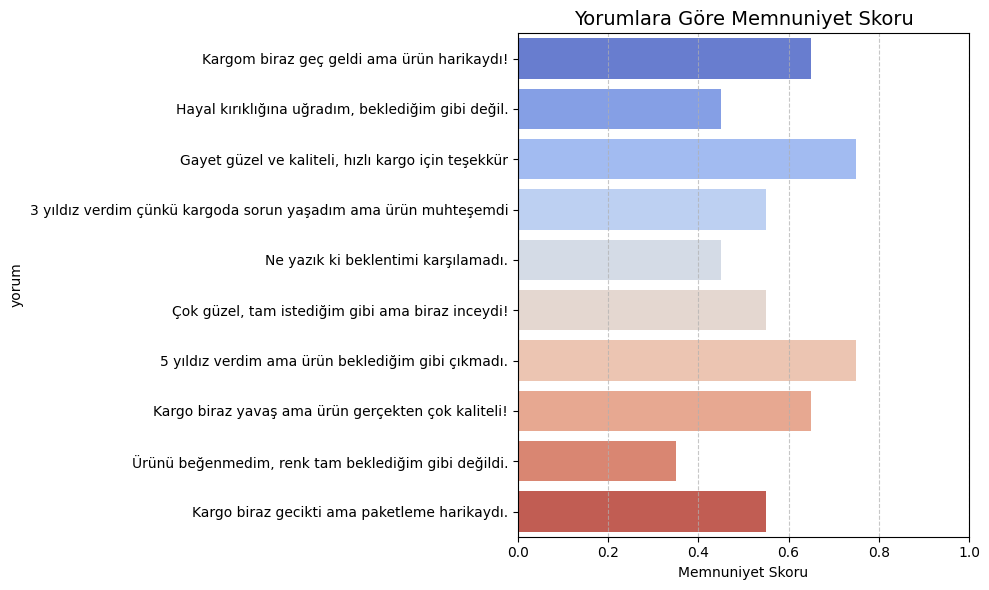

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart görselleştirmesi
plt.figure(figsize=(10, 6))
sns.barplot(x="memnuniyet_skoru", y="yorum", data=df, palette="coolwarm")
plt.title("Yorumlara Göre Memnuniyet Skoru", fontsize=14)
plt.xlabel("Memnuniyet Skoru")
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


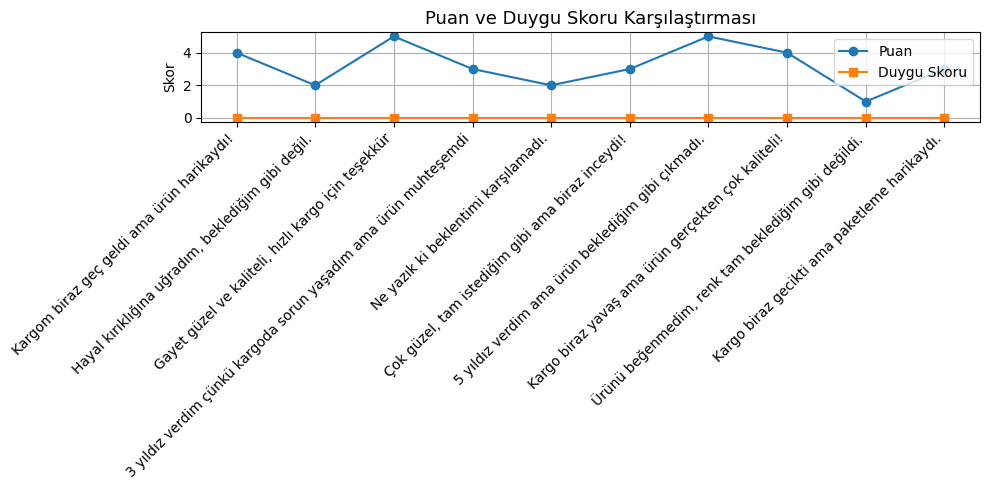

In [24]:
# Çizgi grafik
plt.figure(figsize=(10, 5))
plt.plot(df['yorum'], df['puan'], label="Puan", marker='o')
plt.plot(df['yorum'], df['duygu_skoru'], label="Duygu Skoru", marker='s')
plt.xticks(rotation=45, ha='right')
plt.title("Puan ve Duygu Skoru Karşılaştırması", fontsize=13)
plt.ylabel("Skor")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


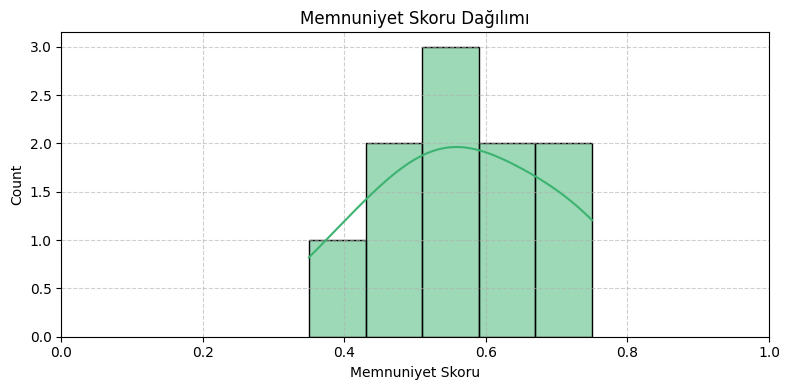

In [23]:
# Memnuniyet Skoru Dağılımı
plt.figure(figsize=(8, 4))
sns.histplot(df['memnuniyet_skoru'], bins=5, kde=True, color='mediumseagreen')
plt.title("Memnuniyet Skoru Dağılımı")
plt.xlabel("Memnuniyet Skoru")
plt.xlim(0, 1)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
